In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

def extract_times(text_lines):
    task_time = defaultdict(list)
    for idx, text_line in enumerate(text_lines):
        if idx % 4 != 0:
            time = float(text_line.strip().split()[-1])
            task_time[idx%4].append(time)
            
    for key, value in task_time.items():
        array = np.array(value)
        mean = np.mean(array)
        std_time = np.std(array, ddof=1)
        error = std_time / np.sqrt(len(array))
        task_time[key] = {"mean": mean, "err": error}
        
    mean
        
    return task_time

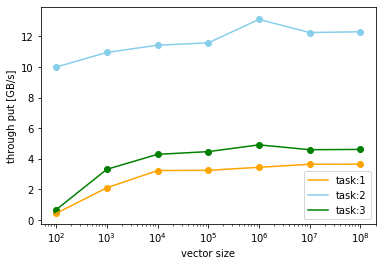

In [42]:
log_dir = "../log"

vec_size = [100, 1000, 10000, 100000, 1000000, 10000000, 100000000]

path_list = []
for size in vec_size:
    path_list.append(log_dir+"/{}.txt".format(size))
    
size_result = {}
for idx, path in enumerate(path_list):
    with open(path, "r") as f:
        text = f.readlines()
    size_result[vec_size[idx]] = extract_times(text)
    
task_size = {}
for size in sorted(size_result.keys()):
    size_task_time = size_result[size]
    for task in size_task_time:
        if task in task_size:
            task_size[task]["mean"].append(size_task_time[task]["mean"])
            task_size[task]["err"].append(size_task_time[task]["err"])
        else:
            task_size[task] = {
                "mean": [size_task_time[task]["mean"]],
                "err": [size_task_time[task]["err"]],
            }
    
    
colors = ["orange", "skyblue", "green"]
    
vec_size = np.array(vec_size)
coef = {
    1: 2*8*1e-9,
    2: 4*8*1e-9,
    3: 3*8*1e-9
}
for task in task_size:
    mean_time = task_size[task]["mean"]
    through_put = (vec_size * coef[task]) / (np.array(mean_time) / 1000)
    err_time = task_size[task]["err"]
#     print(through_put)
#     plt.scatter(vec_size, through_put, label=f"task:{task}", facecolors='none', edgecolors=colors[task-1])
    plt.plot(vec_size, through_put, label=f"task:{task}", color=colors[task-1])
    plt.scatter(vec_size, through_put, color=colors[task-1])
#     plt.errorbar(vec_size, through_put, yerr=err_time, color=colors[task-1])

plt.ylabel('through put [GB/s]')
plt.xlabel('vector size')
# plt.ylim(-5e-4, 5e-4)
plt.xscale('log')
# plt.yscale('log')

plt.legend()
plt.savefig('./throughput.png')
